<a href="https://colab.research.google.com/github/Alii-Tavakolii/Bakery_problem/blob/main/Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**import required libraries**

In [ ]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt
from random import random

We define a function to simulate buying bread from **bakeries**

In [ ]:
Total_breads = 365 #The total number of breads we buy
Tests = 10000 #The number of times we test the approach
satisfaction_probability = [0.3, 0.5, 0.8, 0.2, 0.4] #probability of buying a good bread(for binary satisfaction)

def Buy_bread_general(bakery_index): #for general satisfaction(0, 1)
  if(bakery_index == 1 or bakery_index == 3):
    X = min(1, abs(np.random.normal(0, 1) / 3)) #We use normal distribution for the first bakery and third
    #And get minimum to handle the very small probability that it may be greater than 1
  elif(bakery_index == 2):
    X = np.random.beta(7, 15) #Use Beta(7, 15) distribution for the second bakery
  elif(bakery_index == 4):
    X = np.random.uniform(0, 1) #We use uniform distribution for other bakeries
  else:
    X = np.random.beta(17, 14) #We use Bata(17, 4) distribution for the fifth bakery
  return X

def Buy_bread(bakery_index): #for binary satisfaction
  X = random()
  return 1 if X <= satisfaction_probability[bakery_index] else 0

# **First approach for choosing the bakery**

In [ ]:
def First_approach(N):
  #N = 10 #Number of tests that we do before choosing the bakery
  success = [0] * 5 #For counting number of successes for each bakery
  Satisfaction = 0 #The number of times we were satisfied

  # We buy N loaves of bread from each bakery
  for i in range(5):
    for _ in range(N):
      success[i] += Buy_bread(i)

  Best_bakery = success.index(max(success))
  Satisfaction += sum(success)

  for _ in range(Total_breads - 5 * N):
    Satisfaction += Buy_bread(Best_bakery)

  return Satisfaction

71.84202739726028 10


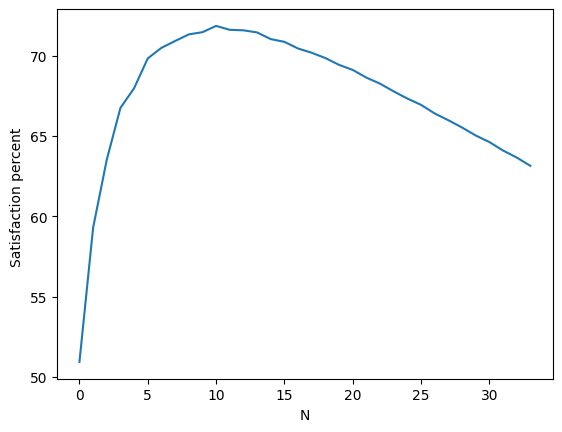

In [ ]:
results_list = list()

for N in range(1, 35):
  results = [First_approach(N) for _ in range(Tests)]
  Average_percent_of_satisfaction = sum(results) / len(results) / Total_breads * 100
  results_list.append(Average_percent_of_satisfaction)

print(max(results_list), results_list.index(max(results_list)))
plt.xlabel("N")
plt.ylabel("Satisfaction percent ")
plt.plot(results_list)
plt.show()
  #print(Average_percent_of_satisfaction, "%")

# **Second approach for choosing the bakery**

# **Binary satisfaction**

In [ ]:
first_time = True #This is true just once for visualizing data
def Second_approach():
  global first_time
  success = [0] * 5 #An array to count good breads for each bakery
  failure = [0] * 5 #An array to count bad breads for each bakery

  Selection_times = [0] * 5 #Counts the number of times each bakery is selected

  for day in range(Total_breads):

    Random_variables = [np.random.beta(success[i] + 1, failure[i] + 1) for i in range(5)] #Generate random variables to choose the bakery
    ind = Random_variables.index(max(Random_variables)) #Select the bakery with max variable
    Selection_times[ind] += 1
    Bread = Buy_bread(ind) #This is 1 when bread is good and 0 o.w.
    success[ind] += Bread #If bread is good we add one to successes of this bakery
    failure[ind] += (1 - Bread) #""

    if not first_time: #We just want to visualize at the first test, Others are for making the conclusion more precise
      continue


    if day in [30, 60, 120, 180, 360] and day != 0: #Visualizing the results for 5 months

      x = np.linspace(0, 1, 1000)
      plt.figure(2 * (day // 30))
      plt.xlabel("x")
      plt.ylabel("f(x)")
      plt.title("Beta Distribution after month " + str(day // 30))

      for bakery in range(5):
        y = beta.pdf(x, success[bakery] + 1, failure[bakery] + 1)
        plt.plot(x, y)

      plt.figure(2 * (day // 30) + 1)
      plt.ylabel("Selection times")
      plt.title("Selection times of bakeries in month " + str(day // 30))
      plt.bar(["bakery " + str(i) for i in range(1, 6)], Selection_times)

    if day % 30 == 0:
      Selection_times = [0] * 5

  first_time = False
  return sum(success)

76.00934246575342 %


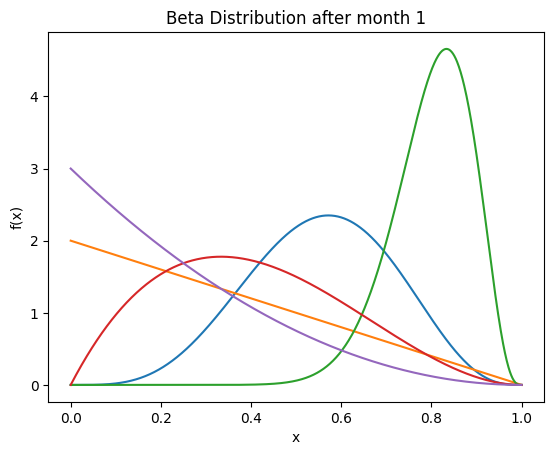

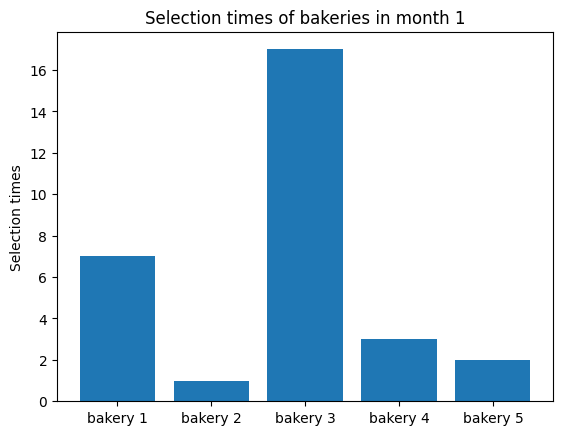

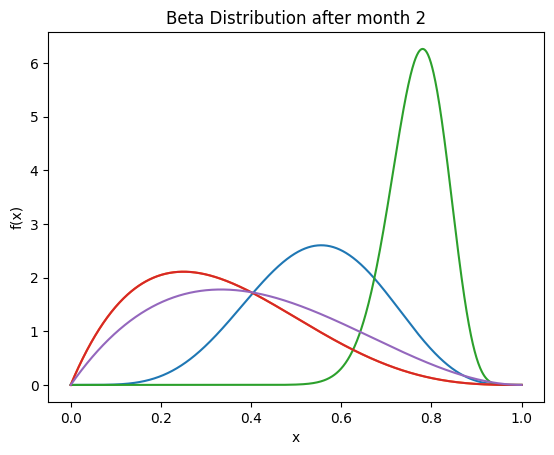

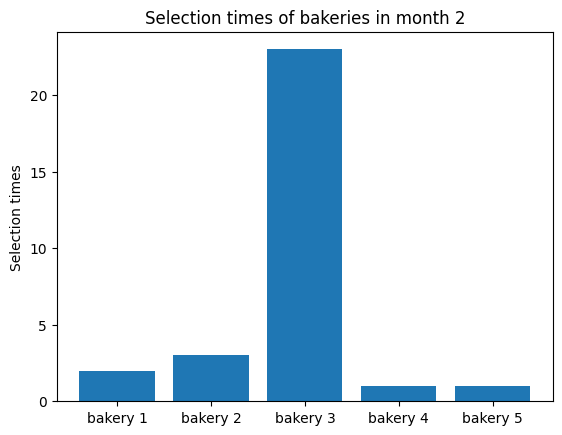

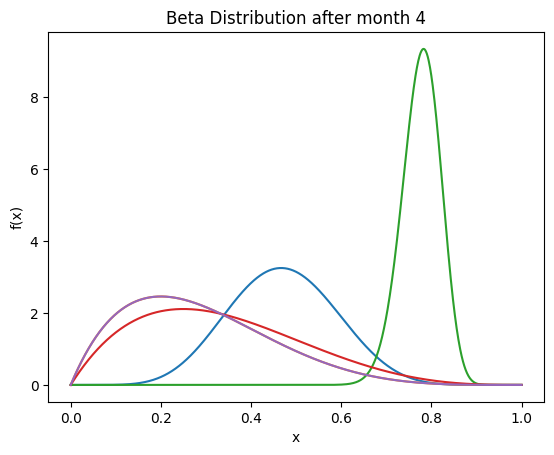

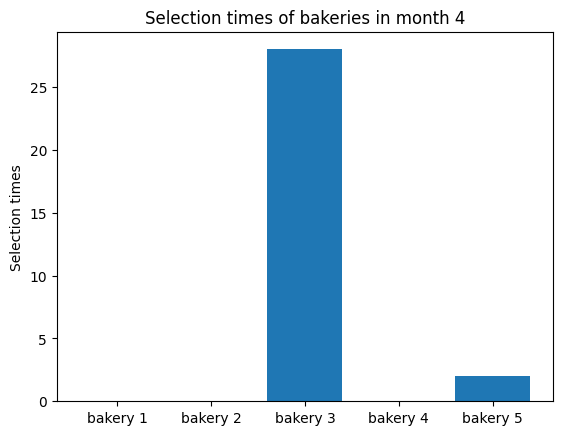

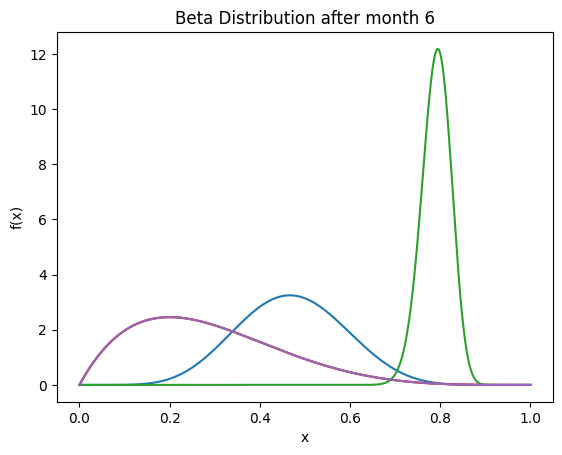

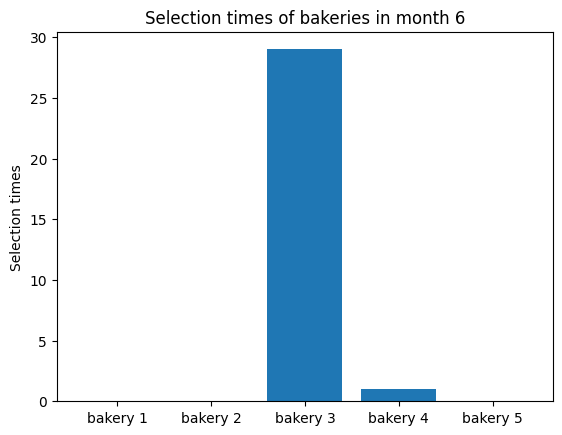

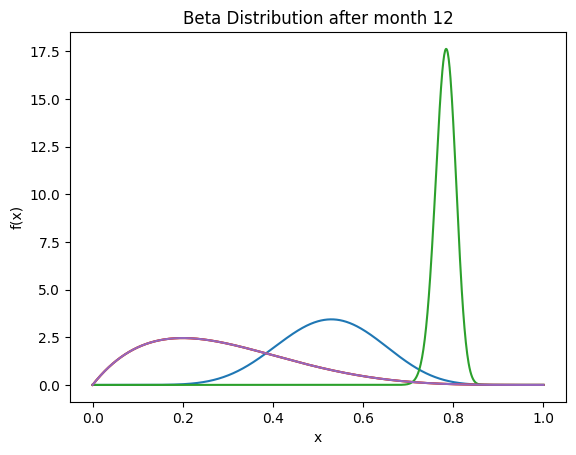

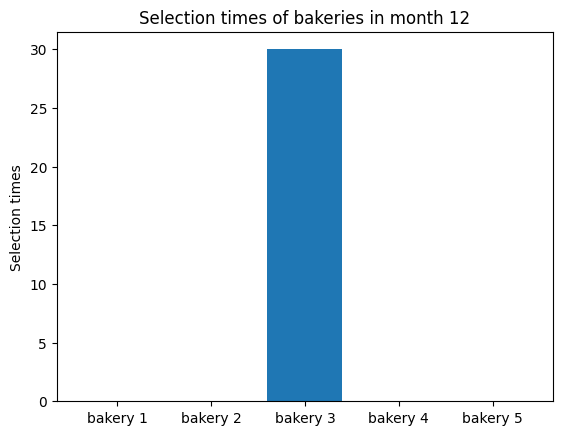

In [ ]:
first_time = True
results = [Second_approach() for _ in range(Tests)]
Average_percent_of_satisfaction = sum(results) / len(results) / Total_breads * 100
print(Average_percent_of_satisfaction, "%")

# **General satisfaction**

In [ ]:
first_time = True #This is true just once for visualizing data
def Second_approach():
  global first_time
  success = [0] * 5 #An array to count good breads for each bakery
  failure = [0] * 5 #An array to count bad breads for each bakery

  Selection_times = [0] * 5 #Counts the number of times each bakery is selected

  for day in range(Total_breads):

    Random_variables = [np.random.beta(success[i] + 1, failure[i] + 1) for i in range(5)] #Generate random variables to choose the bakery
    ind = Random_variables.index(max(Random_variables)) #Select the bakery with max variable
    Selection_times[ind] += 1
    Bread = Buy_bread_general(ind) #This is 1 when bread is good and 0 o.w.
    success[ind] += Bread #If bread is good we add one to successes of this bakery
    failure[ind] += (1 - Bread) #""

    if not first_time: #We just want to visualize at the first test, Others are for making the conclusion more precise
      continue


    if day in [30, 60, 120, 180, 360] and day != 0: #Visualizing the results for 5 months

      x = np.linspace(0, 1, 1000)
      plt.figure(2 * (day // 30))
      plt.xlabel("x")
      plt.ylabel("f(x)")
      plt.title("Beta Distribution after month " + str(day // 30))

      for bakery in range(5):
        y = beta.pdf(x, success[bakery] + 1, failure[bakery] + 1)
        plt.plot(x, y)

      plt.figure(2 * (day // 30) + 1)
      plt.ylabel("Selection times")
      plt.title("Selection times of bakeries in month " + str(day // 30))
      plt.bar(["bakery " + str(i) for i in range(1, 6)], Selection_times)

    if day % 30 == 0:
      Selection_times = [0] * 5

  first_time = False
  return sum(success)

49.97832593832741 %


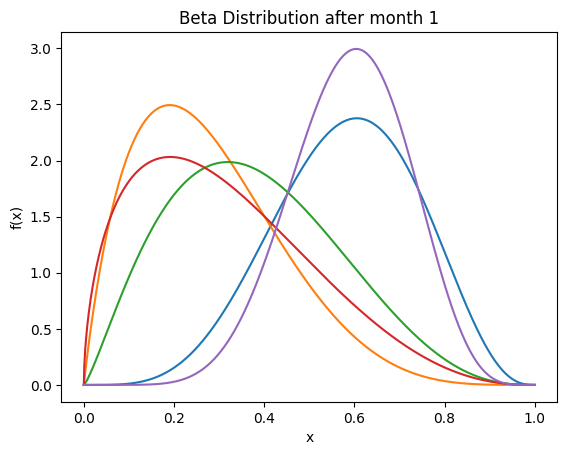

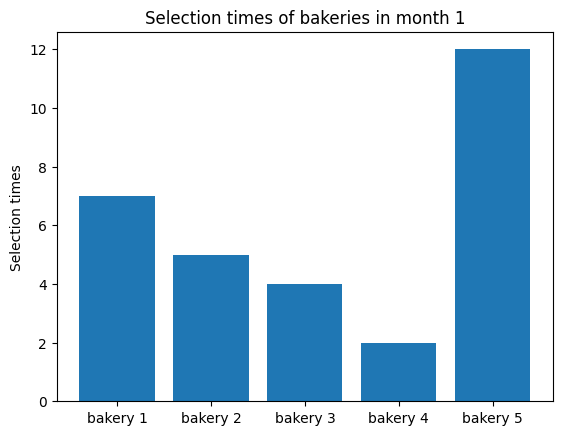

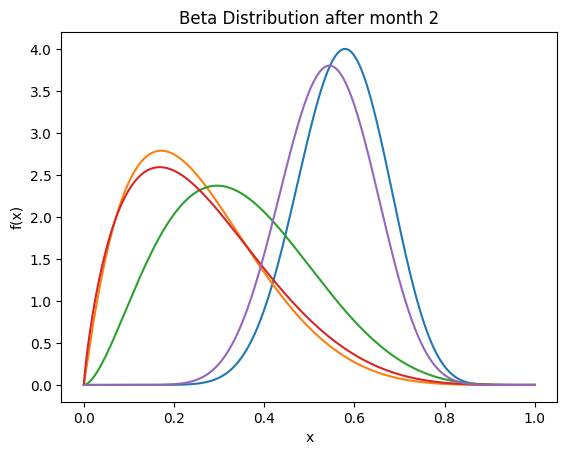

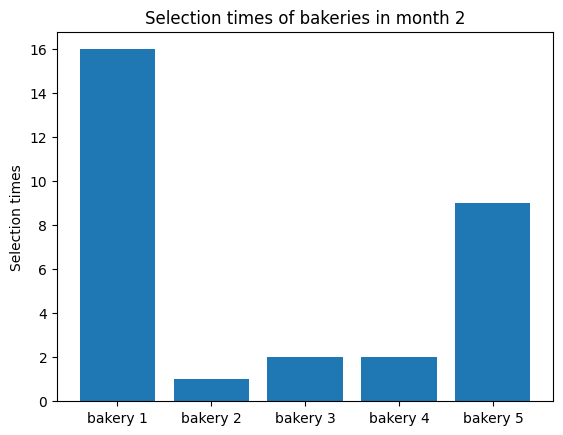

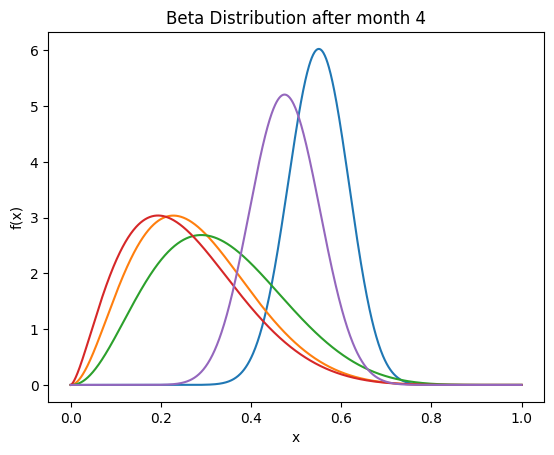

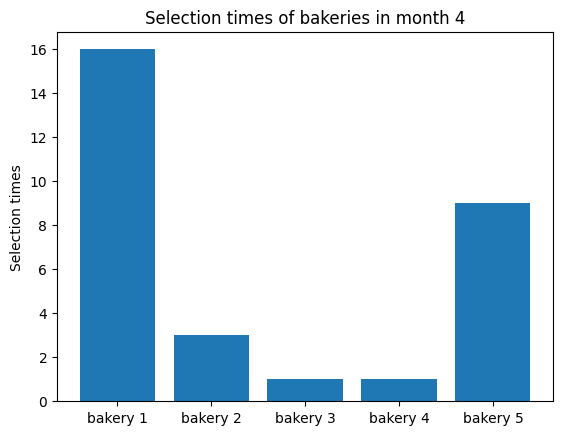

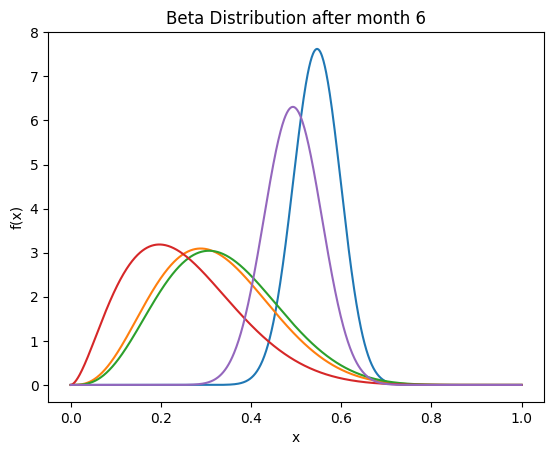

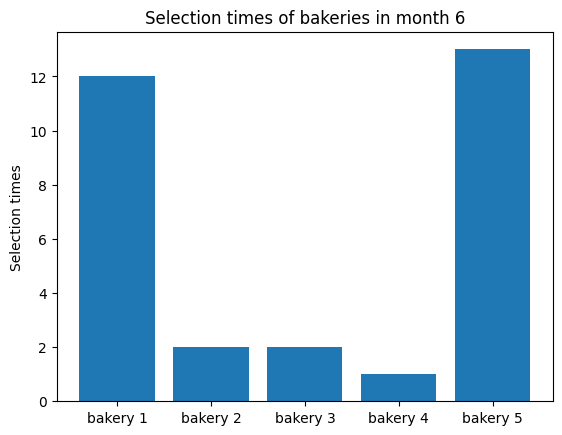

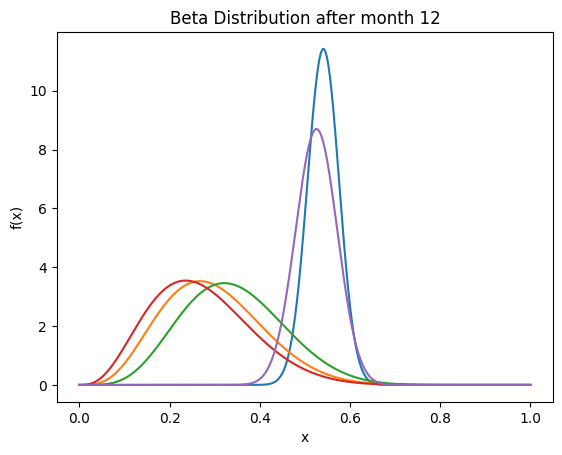

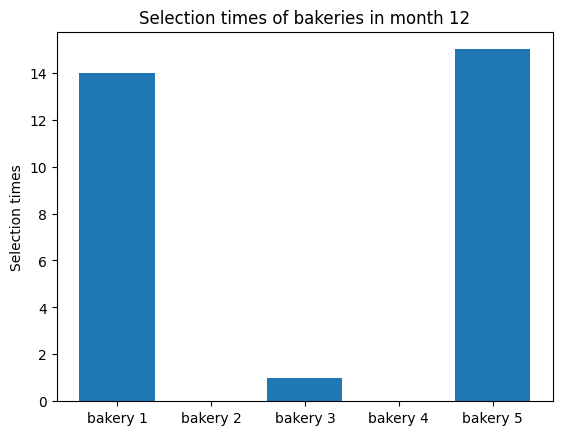

In [ ]:
first_time = True
results = [Second_approach() for _ in range(Tests)]
Average_percent_of_satisfaction = sum(results) / len(results) / Total_breads * 100
print(Average_percent_of_satisfaction, "%")

# **Third** **approach** **for** **choosing** **the** **bakery**

In [ ]:
import random
import matplotlib.pyplot as plt


In [ ]:
class Bakery:
    def __init__(self,satisfaction_probability ):
        self.bakeries = range(len(satisfaction_probability)) # Set the bakeries as the range of indices
        self.probs = satisfaction_probability # Assign the bakery probabilities

    def sample(self, bakery):
        selector = random.random() # Generate a random number between 0 and 1

        if selector <= self.probs[bakery]:
            return 1 # Return 1 if the random number is less than or equal to the bakery probability
        else:
            return 0

In [ ]:
def explore_greedy(explorer, days, initial_days=20, exploration_rate=0.2):
    chosen_bakeries = [] # List to store chosen bakery indices
    rewards = [0] * len(explorer.bakeries) # Initialize rewards list for each bakery

    for day in range(days):
        if day < initial_days or random.random() < exploration_rate:
            chosen_bakery = random.choice(list(explorer.bakeries)) # Randomly choose a bakery
        else:
            best_bakery = rewards.index(max(rewards)) # Find the bakery index with the highest rewards
            chosen_bakery = best_bakery # Choose the bakery with the highest rewards

        reward = explorer.sample(chosen_bakery) # Sample the chosen bakery to get a reward
        rewards[chosen_bakery] += reward # Update the reward list
        chosen_bakeries.append(chosen_bakery) # Append the chosen bakery index to the list

    return chosen_bakeries, rewards

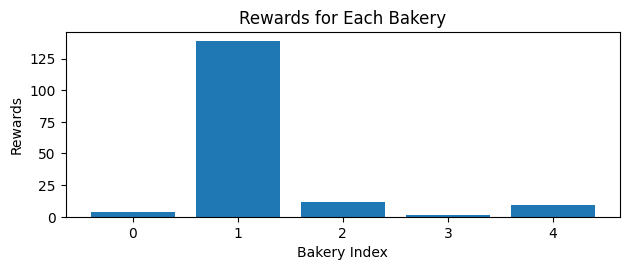

Average Percent of Satisfaction: 0.45%


In [ ]:

satisfaction_probability =[0.3, 0.5, 0.8, 0.2, 0.4]
explorer = Bakery(satisfaction_probability)
num_days = 365

chosen_bakeries, rewards = explore_greedy(explorer, num_days)

# Calculate the average percent of satisfaction
avg_percent_of_satisfaction = sum(rewards) / (num_days * 100) * 100

# Plotting the rewards for each bakery
plt.subplot(2, 1, 2)
plt.bar(range(len(explorer.bakeries)), rewards, tick_label=explorer.bakeries)
plt.xlabel('Bakery Index')
plt.ylabel('Rewards')
plt.title('Rewards for Each Bakery')

plt.tight_layout()

plt.show()
print(f'Average Percent of Satisfaction: {avg_percent_of_satisfaction:.2f}%')